In [1]:
#Importamos las  librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn import  metrics
from sklearn.metrics import accuracy_score

### Paso 1: Leemos el Dataset

In [2]:
dataset_estadisticas_definitivo = pd.read_csv(r"https://raw.githubusercontent.com/PabloLedo97/Datasets-Master-Big-Data/main/DatasetDefinitivo_Pablo_Ledo.csv",sep=";",encoding='latin-1');
dataset_estadisticas_definitivo

,Equipo,Local/Visitante,Goles_Locales,Suma_Goles_Locales_Acumulados,Media_Goles_Locales,Goles_Visitantes,Suma_Goles_Visitantes_Acumulados,Media_Goles_Visitantes,Puntos_Locales,Media_Puntos_Locales,Puntos_Locales_Acumulados,Puntos_Visitantes,Media_Puntos_Visitantes,Puntos_Visitantes_Acumulados,Resultados,Fecha,Temporada
0,Málaga,Local,0,0,"1,37",0,0,0,1,"1,58",1,0,0,0,x,21/08/2015,2015/2016
1,Sevilla,Visitante,0,0,0,0,0,"0,68",0,0,0,1,"0,47",1,x,21/08/2015,2015/2016
2,Atlético,Local,1,1,"1,74",0,0,0,3,"2,53",3,0,0,0,1,22/08/2015,2015/2016
3,Las Palmas,Visitante,0,0,0,0,0,"1,05",0,0,0,0,"0,79",0,1,22/08/2015,2015/2016
4,Espanyol,Local,1,1,"1,16",0,0,0,3,"1,68",3,0,0,0,1,22/08/2015,2015/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,Villarreal,Visitante,0,0,0,2,20,"1,21",0,0,0,3,"1,21",23,2,22/05/2022,2021/2022
5316,R. Sociedad,Local,1,16,"0,84",0,0,0,0,"1,84",33,0,0,0,2,22/05/2022,2021/2022
5317,Atlético,Visitante,0,0,0,2,32,"1,68",0,0,0,3,"1,58",30,2,22/05/2022,2021/2022
5318,Sevilla,Local,1,36,"1,89",0,0,0,3,"2,21",40,0,0,0,1,22/05/2022,2021/2022


### Paso 2: Definimos  la matriz de entrenamiento y el conjunto de prueba

In [3]:
#Definimos las columnas del dataset que van a participar en la matriz
goles_locales = dataset_estadisticas_definitivo.Goles_Locales.tolist()
goles_locales_acumulados = dataset_estadisticas_definitivo.Suma_Goles_Locales_Acumulados.tolist()
goles_visitantes = dataset_estadisticas_definitivo.Goles_Visitantes.tolist()
goles_visitantes_acumulados = dataset_estadisticas_definitivo.Suma_Goles_Visitantes_Acumulados.tolist()

#Generamos la matriz
matriz =np.array([goles_locales,goles_locales_acumulados,goles_visitantes,goles_visitantes_acumulados])


#Generamos el vector con el conjunto de datos que queremos predecir
vector = dataset_estadisticas_definitivo.Resultados.tolist()

### Paso 3: División de los datos en conjunto de entrenamiento y test

In [4]:
#Conjunto de entrenamiento
X_train = matriz.transpose()
y_train = vector

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size= 0.2,random_state = 123)

### Paso 4:  Definición Modelo

In [5]:
modelo = CatBoostClassifier(iterations=1000,learning_rate=1,depth=2)

### Paso 5:  Entrenamiento del Modelo

In [6]:
modelo.fit(X_train, y_train)

0:	learn: 0.9510550	total: 167ms	remaining: 2m 47s
1:	learn: 0.8888077	total: 169ms	remaining: 1m 24s
2:	learn: 0.8439138	total: 170ms	remaining: 56.6s
3:	learn: 0.8247899	total: 172ms	remaining: 42.8s
4:	learn: 0.8182631	total: 173ms	remaining: 34.5s
5:	learn: 0.8156924	total: 175ms	remaining: 28.9s
6:	learn: 0.8148699	total: 176ms	remaining: 25s
7:	learn: 0.8141218	total: 177ms	remaining: 22s
8:	learn: 0.8112229	total: 179ms	remaining: 19.7s
9:	learn: 0.8072803	total: 180ms	remaining: 17.8s
10:	learn: 0.8058368	total: 182ms	remaining: 16.3s
11:	learn: 0.8053888	total: 183ms	remaining: 15.1s
12:	learn: 0.8032293	total: 184ms	remaining: 14s
13:	learn: 0.8027920	total: 185ms	remaining: 13.1s
14:	learn: 0.8018634	total: 187ms	remaining: 12.3s
15:	learn: 0.8010441	total: 188ms	remaining: 11.6s
16:	learn: 0.8005857	total: 189ms	remaining: 10.9s
17:	learn: 0.8004227	total: 191ms	remaining: 10.4s
18:	learn: 0.7999543	total: 192ms	remaining: 9.92s
19:	learn: 0.7986259	total: 194ms	remaining: 

238:	learn: 0.7695844	total: 504ms	remaining: 1.6s
239:	learn: 0.7693927	total: 506ms	remaining: 1.6s
240:	learn: 0.7690583	total: 507ms	remaining: 1.6s
241:	learn: 0.7690483	total: 509ms	remaining: 1.59s
242:	learn: 0.7690421	total: 511ms	remaining: 1.59s
243:	learn: 0.7689698	total: 512ms	remaining: 1.59s
244:	learn: 0.7688920	total: 514ms	remaining: 1.58s
245:	learn: 0.7688880	total: 515ms	remaining: 1.58s
246:	learn: 0.7688830	total: 517ms	remaining: 1.57s
247:	learn: 0.7688752	total: 518ms	remaining: 1.57s
248:	learn: 0.7688749	total: 520ms	remaining: 1.57s
249:	learn: 0.7688671	total: 521ms	remaining: 1.56s
250:	learn: 0.7688486	total: 523ms	remaining: 1.56s
251:	learn: 0.7688427	total: 524ms	remaining: 1.55s
252:	learn: 0.7688011	total: 525ms	remaining: 1.55s
253:	learn: 0.7687623	total: 527ms	remaining: 1.55s
254:	learn: 0.7687493	total: 528ms	remaining: 1.54s
255:	learn: 0.7687182	total: 530ms	remaining: 1.54s
256:	learn: 0.7687017	total: 531ms	remaining: 1.53s
257:	learn: 0.7

499:	learn: 0.7635957	total: 851ms	remaining: 851ms
500:	learn: 0.7635913	total: 852ms	remaining: 849ms
501:	learn: 0.7635558	total: 854ms	remaining: 847ms
502:	learn: 0.7635537	total: 855ms	remaining: 845ms
503:	learn: 0.7635336	total: 857ms	remaining: 843ms
504:	learn: 0.7635177	total: 858ms	remaining: 841ms
505:	learn: 0.7635089	total: 859ms	remaining: 839ms
506:	learn: 0.7635082	total: 861ms	remaining: 837ms
507:	learn: 0.7635017	total: 862ms	remaining: 835ms
508:	learn: 0.7634233	total: 864ms	remaining: 833ms
509:	learn: 0.7633585	total: 865ms	remaining: 831ms
510:	learn: 0.7633561	total: 866ms	remaining: 829ms
511:	learn: 0.7633444	total: 868ms	remaining: 827ms
512:	learn: 0.7633440	total: 869ms	remaining: 825ms
513:	learn: 0.7633151	total: 870ms	remaining: 823ms
514:	learn: 0.7633127	total: 872ms	remaining: 821ms
515:	learn: 0.7633081	total: 873ms	remaining: 819ms
516:	learn: 0.7633068	total: 874ms	remaining: 817ms
517:	learn: 0.7633021	total: 876ms	remaining: 815ms
518:	learn: 

744:	learn: 0.7596027	total: 1.19s	remaining: 409ms
745:	learn: 0.7596016	total: 1.2s	remaining: 407ms
746:	learn: 0.7596010	total: 1.2s	remaining: 406ms
747:	learn: 0.7595931	total: 1.2s	remaining: 404ms
748:	learn: 0.7595727	total: 1.2s	remaining: 402ms
749:	learn: 0.7595716	total: 1.2s	remaining: 401ms
750:	learn: 0.7595565	total: 1.2s	remaining: 399ms
751:	learn: 0.7595550	total: 1.2s	remaining: 397ms
752:	learn: 0.7595319	total: 1.21s	remaining: 396ms
753:	learn: 0.7595314	total: 1.21s	remaining: 394ms
754:	learn: 0.7595178	total: 1.21s	remaining: 392ms
755:	learn: 0.7595177	total: 1.21s	remaining: 391ms
756:	learn: 0.7595154	total: 1.21s	remaining: 389ms
757:	learn: 0.7595152	total: 1.21s	remaining: 387ms
758:	learn: 0.7595013	total: 1.21s	remaining: 386ms
759:	learn: 0.7595006	total: 1.22s	remaining: 384ms
760:	learn: 0.7594997	total: 1.22s	remaining: 382ms
761:	learn: 0.7594995	total: 1.22s	remaining: 381ms
762:	learn: 0.7594994	total: 1.22s	remaining: 379ms
763:	learn: 0.75949

946:	learn: 0.7576801	total: 1.55s	remaining: 86.7ms
947:	learn: 0.7576791	total: 1.55s	remaining: 85.3ms
948:	learn: 0.7576520	total: 1.56s	remaining: 83.9ms
949:	learn: 0.7576506	total: 1.57s	remaining: 82.5ms
950:	learn: 0.7576483	total: 1.57s	remaining: 81ms
951:	learn: 0.7576229	total: 1.58s	remaining: 79.6ms
952:	learn: 0.7576215	total: 1.58s	remaining: 78.1ms
953:	learn: 0.7575929	total: 1.59s	remaining: 76.7ms
954:	learn: 0.7575666	total: 1.59s	remaining: 75.2ms
955:	learn: 0.7575664	total: 1.6s	remaining: 73.7ms
956:	learn: 0.7575645	total: 1.61s	remaining: 72.2ms
957:	learn: 0.7575621	total: 1.61s	remaining: 70.7ms
958:	learn: 0.7575519	total: 1.62s	remaining: 69.2ms
959:	learn: 0.7575513	total: 1.62s	remaining: 67.6ms
960:	learn: 0.7575505	total: 1.63s	remaining: 66.1ms
961:	learn: 0.7575359	total: 1.63s	remaining: 64.6ms
962:	learn: 0.7575329	total: 1.64s	remaining: 63ms
963:	learn: 0.7575315	total: 1.65s	remaining: 61.5ms
964:	learn: 0.7575108	total: 1.65s	remaining: 59.9m

### Paso 6: Realizamos la predicción

In [7]:
predicciones = modelo.predict(X_test)
predicciones

array([['x'],
       ['1'],
       ['2'],
       ...,
       ['1'],
       ['1'],
       ['1']], dtype=object)

### Paso 7: Evaluación modelo

#### Cálculo accuracy

In [8]:
accuracy = accuracy_score(y_true= y_test,y_pred= predicciones,normalize = True)
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 60.43233082706767 %


#### Cálculo Matriz de Confusión

[[379  39  84]
 [ 48 203  52]
 [110  88  61]]


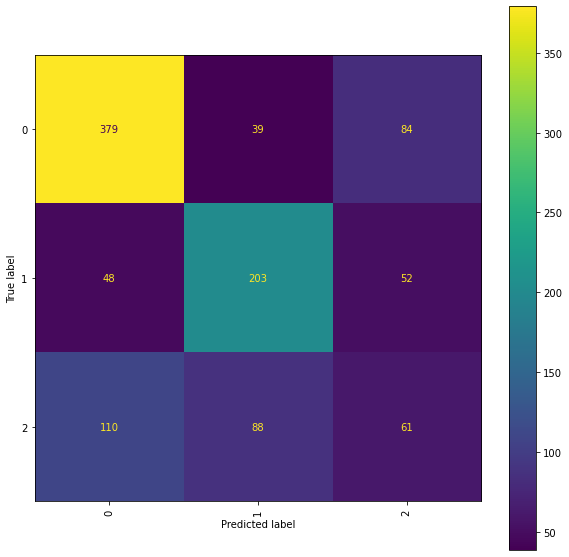

In [9]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

display = ConfusionMatrixDisplay.from_predictions(y_test,predicciones,display_labels = modelo.classes_,colorbar = False,cmap = 'Greens')


#### Clasification Report

In [10]:
from sklearn.metrics import classification_report

reporte_clasificacion = classification_report(y_test, predicciones)

print(reporte_clasificacion)

              precision    recall  f1-score   support

           1       0.71      0.75      0.73       502
           2       0.62      0.67      0.64       303
           x       0.31      0.24      0.27       259

    accuracy                           0.60      1064
   macro avg       0.54      0.55      0.55      1064
weighted avg       0.58      0.60      0.59      1064

